In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib as mpl
import sklearn as skl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix


In [2]:
data=pd.read_csv("Bengaluru_House_Data.csv")

In [3]:
data2=data.copy()
data3=data2.copy()

In [4]:
data.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [5]:
missing=data2[data2.isnull().any(axis=1)]

In [6]:
missing.shape

(5824, 9)

In [7]:
data2.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [8]:
data2["balcony"].fillna(data2["balcony"].mode(),\
                        inplace=True)

In [9]:
data2.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [10]:
np.unique(data["balcony"])

array([ 0.,  1.,  2.,  3., nan])

In [11]:
np.unique(data["bath"])

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 18., 27., 40., nan])

In [12]:
data2

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [13]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [14]:
data2.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [15]:
#data2["balcony"].fillna(data2["balcony"].mode(),\
                      # inplace=True)
data2.mean()

C:\Users\shaik\AppData\Local\Temp\ipykernel_18372\1060487841.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data2.mean()


bath         2.692610
balcony      1.584376
price      112.565627
dtype: float64

In [16]:
data2["bath"].value_counts().index[0]


2.0

In [17]:
data2["bath"].fillna(data2["bath"].value_counts().index[0],inplace=True)


In [18]:
data2.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath               0
balcony          609
price              0
dtype: int64

In [19]:
data2["size"].value_counts().index[0]


'2 BHK'

In [20]:
data2["balcony"].value_counts().index[0]

2.0

In [21]:
data2["size"].fillna(data2["size"].value_counts().index[0],inplace=True)


In [22]:
data2["balcony"].fillna(data2["balcony"].value_counts().index[0],inplace=True)


In [23]:
data2.isnull().sum()

area_type          0
availability       0
location           1
size               0
society         5502
total_sqft         0
bath               0
balcony            0
price              0
dtype: int64

In [24]:
data2["location"].value_counts().index[0]

'Whitefield'

In [25]:
data2["location"].fillna(data2["location"].value_counts().index[0],inplace=True)


In [26]:
data2["society"].value_counts().index[0]

'GrrvaGr'

In [27]:
data2["society"].fillna(data2["society"].value_counts().index[0],inplace=True)


In [28]:
data2.isnull().sum()

area_type       0
availability    0
location        0
size            0
society         0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [29]:
data2.describe()

,bath,balcony,price
count,13320.000000,13320.000000,13320.000000
mean,2.688814,1.603378,112.565627
std,1.338754,0.803067,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


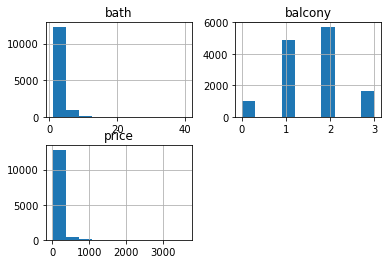

In [30]:
data2.hist()
plt.show()

In [31]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13320 non-null  object 
 3   size          13320 non-null  object 
 4   society       13320 non-null  object 
 5   total_sqft    13320 non-null  object 
 6   bath          13320 non-null  float64
 7   balcony       13320 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


<AxesSubplot:xlabel='balcony', ylabel='price'>

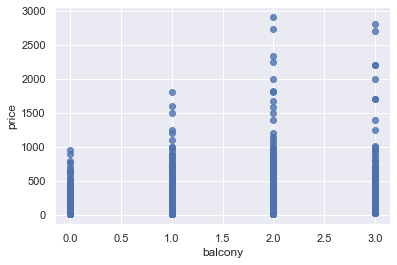

In [32]:
sns.set(style="darkgrid")
sns.regplot(x=data["balcony"],y=data2["price"],fit_reg=False)

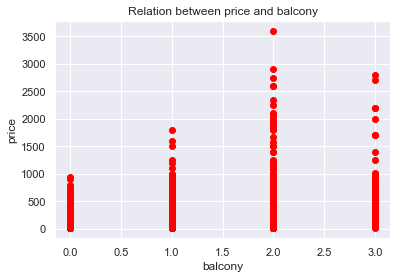

In [33]:
plt.scatter(data2["balcony"],data2["price"],c="red")
plt.title("Relation between price and balcony")
plt.xlabel("balcony")
plt.ylabel("price")
plt.show()

<AxesSubplot:ylabel='price'>

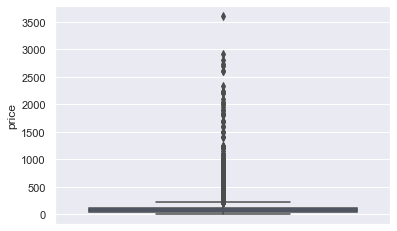

In [34]:
sns.boxplot(y=data2["price"])

In [35]:
var=data2.select_dtypes(exclude=["object"])

In [36]:
var=var.corr()

In [37]:
var

,bath,balcony,price
bath,1.000000,0.207970,0.454449
balcony,0.207970,1.000000,0.124951
price,0.454449,0.124951,1.000000


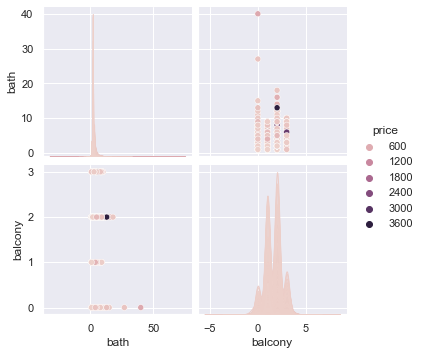

In [38]:
sns.pairplot(data2,kind="scatter",hue="price")
plt.show()

In [39]:
data2

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,GrrvaGr,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,GrrvaGr,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,GrrvaGr,3600,5.0,2.0,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [40]:
data2["size"].value_counts()

2 BHK         5215
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [41]:
data2["size"].nbytes

106560

In [42]:
data2["size"].astype("category").nbytes

13568

In [43]:
data2["size"].replace("4 Bedroom","4 BHK",inplace=True)
data2["size"].replace("3 Bedroom","3 BHK",inplace=True)
data2["size"].replace("2 Bedroom","2 BHK",inplace=True)
data2["size"].replace("5 Bedroom","5 BHK",inplace=True)
data2["size"].replace("6 Bedroom","6 BHK",inplace=True)
data2["size"].replace("1 Bedroom","1 BHK",inplace=True)
data2["size"].replace("8 Bedroom","8 BHK",inplace=True)
data2["size"].replace("7 Bedroom","7 BHK",inplace=True)
data2["size"].replace("9 Bedroom","9 BHK",inplace=True)
data2["size"].replace("10 Bedroom","10 BHK",inplace=True)
data2["size"].replace("11 Bedroom","11 BHK",inplace=True)
data2["size"].replace("12 Bedroom","12 BHK",inplace=True)
data2["size"].replace("43 Bedroom","43 BHK",inplace=True)
data2["size"].replace("18 Bedroom","18 BHK",inplace=True)
data2["size"].replace("1 RK","1 BHK",inplace=True)

In [44]:
data2["size"].value_counts()

2 BHK     5544
3 BHK     4857
4 BHK     1417
1 BHK      656
5 BHK      356
6 BHK      221
7 BHK      100
8 BHK       89
9 BHK       54
10 BHK      14
11 BHK       4
27 BHK       1
19 BHK       1
16 BHK       1
43 BHK       1
14 BHK       1
12 BHK       1
13 BHK       1
18 BHK       1
Name: size, dtype: int64

In [45]:
data2["balcony"].value_counts()

2.0    5722
1.0    4897
3.0    1672
0.0    1029
Name: balcony, dtype: int64

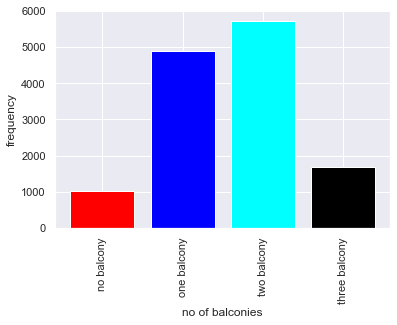

In [46]:
counts=[1029,4897,5722,1672]
balconynum=("no balcony","one balcony","two balcony","three balcony")
index=np.arange(len(balconynum))
plt.bar(index,counts,color=["red","blue","cyan","black"])
plt.xlabel("no of balconies")
plt.ylabel("frequency")
plt.xticks(index,balconynum,rotation=90)
plt.show()

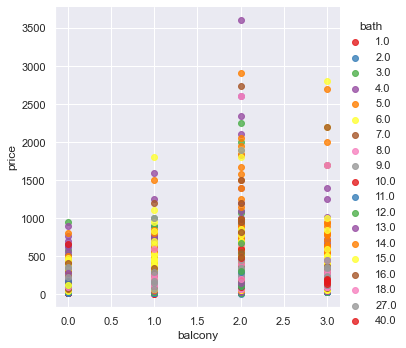

In [47]:
#scatter plot of price vs bath vs balcony
sns.lmplot(x="balcony",y="price",data=data2,fit_reg=False,hue="bath",legend=True,palette="Set1")

<AxesSubplot:xlabel='balcony', ylabel='count'>

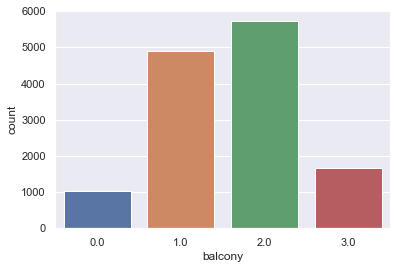

In [48]:
sns.countplot(x="balcony",data=data2)

<AxesSubplot:xlabel='balcony', ylabel='price'>

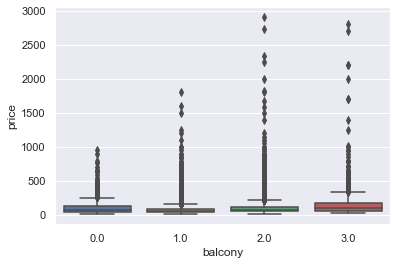

In [49]:
sns.boxplot(x=data["balcony"],y=data2["price"])

In [50]:
balcony = pd.crosstab(index = data2["balcony"], columns  = 'count', normalize = True)

In [51]:
balcony

col_0,count
balcony,
0.0,0.077252
1.0,0.367643
2.0,0.429580
3.0,0.125526


In [52]:
balcony_price = pd.crosstab(index = data2["balcony"],columns = data2['price'], margins = True, normalize =  'index') 

In [53]:
balcony_price

price,8.00,8.44,9.00,10.00,10.25,10.50,11.00,11.50,11.66,12.00,...,2100.00,2200.00,2250.00,2340.00,2600.00,2700.00,2736.00,2800.00,2912.00,3600.00
balcony,,,,,,,,,,,,,,,,,,,,,
0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000972,0.000000,0.000000,0.000972,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
1.0,0.000204,0.000000,0.000204,0.001021,0.000408,0.000000,0.000408,0.000817,0.000000,0.000817,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
2.0,0.000000,0.000175,0.000000,0.000175,0.000000,0.000000,0.000000,0.000000,0.000000,0.000175,...,0.000175,0.000000,0.000175,0.000175,0.00035,0.000000,0.000175,0.000000,0.000175,0.000175
3.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.001196,0.000000,0.000000,0.00000,0.000598,0.000000,0.000598,0.000000,0.000000
All,0.000075,0.000075,0.000075,0.000450,0.000150,0.000075,0.000150,0.000300,0.000075,0.000375,...,0.000075,0.000150,0.000075,0.000075,0.00015,0.000075,0.000075,0.000075,0.000075,0.000075


C:\Users\shaik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


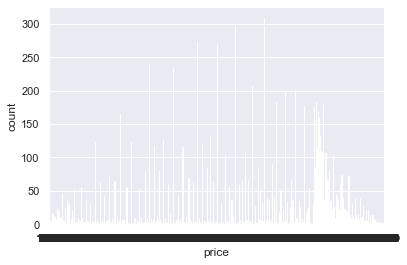

In [54]:
price = sns.countplot(data2['price'])


In [55]:
price

<AxesSubplot:xlabel='price', ylabel='count'>

C:\Users\shaik\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bath'>

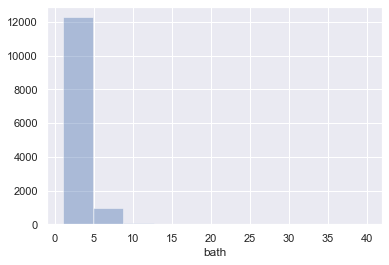

In [56]:
sns.distplot(data2['bath'], bins=10, kde=False)

In [57]:
summary=data2.describe()
summary

,bath,balcony,price
count,13320.000000,13320.000000,13320.000000
mean,2.688814,1.603378,112.565627
std,1.338754,0.803067,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [58]:
summary_cate=data2.describe(include="O")

In [59]:
summary_cate

,area_type,availability,location,size,society,total_sqft
count,13320,13320,13320,13320,13320,13320
unique,4,81,1305,19,2688,2117
top,Super built-up Area,Ready To Move,Whitefield,2 BHK,GrrvaGr,1200
freq,8790,10581,541,5544,5582,843


In [60]:
data2.corr()

,bath,balcony,price
bath,1.000000,0.207970,0.454449
balcony,0.207970,1.000000,0.124951
price,0.454449,0.124951,1.000000


In [61]:
data2.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [62]:
area_type = pd.crosstab(index = data2["area_type"], columns  = 'count', normalize = True)


In [63]:
area_type

col_0,count
area_type,
Built-up Area,0.181532
Carpet Area,0.006532
Plot Area,0.152027
Super built-up Area,0.659910


In [64]:
area_price = pd.crosstab(index = data2["area_type"],columns = data2['price'], margins = True, normalize =  'index') 
area_price

price,8.00,8.44,9.00,10.00,10.25,10.50,11.00,11.50,11.66,12.00,...,2100.00,2200.00,2250.00,2340.00,2600.00,2700.00,2736.00,2800.00,2912.00,3600.00
area_type,,,,,,,,,,,,,,,,,,,,,
Built-up Area,0.000000,0.000000,0.000414,0.000827,0.000414,0.000000,0.000414,0.000827,0.000000,0.001654,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Carpet Area,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Plot Area,0.000000,0.000494,0.000000,0.000000,0.000000,0.000494,0.000000,0.000000,0.000000,0.000000,...,0.000494,0.000000,0.000494,0.000494,0.000988,0.000000,0.000494,0.000494,0.000000,0.000494
Super built-up Area,0.000114,0.000000,0.000000,0.000455,0.000114,0.000000,0.000114,0.000228,0.000114,0.000114,...,0.000000,0.000228,0.000000,0.000000,0.000000,0.000114,0.000000,0.000000,0.000114,0.000000
All,0.000075,0.000075,0.000075,0.000450,0.000150,0.000075,0.000150,0.000300,0.000075,0.000375,...,0.000075,0.000150,0.000075,0.000075,0.000150,0.000075,0.000075,0.000075,0.000075,0.000075


C:\Users\shaik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='area_type', ylabel='price'>

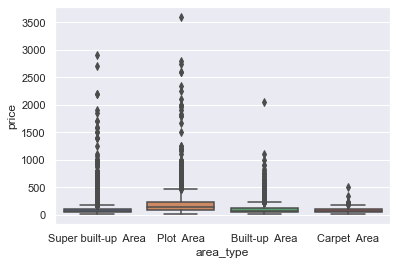

In [65]:
sns.boxplot("area_type","price",data=data2)

In [66]:
new_data=pd.get_dummies(data2,drop_first=True)

In [67]:
columns_list=list(new_data.columns)

In [68]:
new_data

,bath,balcony,price,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,availability_14-Nov,availability_15-Aug,availability_15-Dec,availability_15-Jun,...,total_sqft_990,total_sqft_991,total_sqft_992,total_sqft_993,total_sqft_994,total_sqft_995,total_sqft_996,total_sqft_997,total_sqft_998,total_sqft_999
0,2.0,1.0,39.07,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.0,3.0,120.00,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,3.0,62.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.0,1.0,95.00,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,1.0,51.00,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13315,4.0,0.0,231.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13316,5.0,2.0,400.00,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13317,2.0,1.0,60.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13318,4.0,1.0,488.00,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
data2['area_type']=data2['area_type'].map({"Super built-up  Area":0,'Plot  Area':1,"Built-up  Area":2,"Carpet  Area":3})

In [70]:
data2["area_type"]
new_data=pd.get_dummies(data2, drop_first=True)
columns_list=list(new_data.columns)
data2["area_type"].value_counts()

0    8790
2    2418
1    2025
3      87
Name: area_type, dtype: int64

In [71]:
columns_list

['area_type',
 'bath',
 'balcony',
 'price',
 'availability_14-Nov',
 'availability_15-Aug',
 'availability_15-Dec',
 'availability_15-Jun',
 'availability_15-Nov',
 'availability_15-Oct',
 'availability_16-Dec',
 'availability_16-Jan',
 'availability_16-Jul',
 'availability_16-Mar',
 'availability_16-Nov',
 'availability_16-Oct',
 'availability_16-Sep',
 'availability_17-Apr',
 'availability_17-Aug',
 'availability_17-Dec',
 'availability_17-Feb',
 'availability_17-Jan',
 'availability_17-Jul',
 'availability_17-Jun',
 'availability_17-Mar',
 'availability_17-May',
 'availability_17-Nov',
 'availability_17-Oct',
 'availability_17-Sep',
 'availability_18-Apr',
 'availability_18-Aug',
 'availability_18-Dec',
 'availability_18-Feb',
 'availability_18-Jan',
 'availability_18-Jul',
 'availability_18-Jun',
 'availability_18-Mar',
 'availability_18-May',
 'availability_18-Nov',
 'availability_18-Oct',
 'availability_18-Sep',
 'availability_19-Apr',
 'availability_19-Aug',
 'availability_19-D

In [72]:
features=list(set(columns_list)-set(['area_type']))
y=new_data['area_type'].values
x = new_data[features].values

In [73]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.3, random_state=0)

In [74]:
logistic = LogisticRegression()

# Fitting the values for x and y
logistic.fit(train_x,train_y)
logistic.coef_
logistic.intercept_

C:\Users\shaik\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([ 1.27865192, -0.91483291, -0.06100579, -0.30281322])

In [75]:
prediction = logistic.predict(test_x)
print(prediction)

[0 0 0 ... 0 0 0]


In [76]:
confusion_matrix = confusion_matrix(test_y, prediction)
confusion_matrix

array([[2539,   87,   21,    0],
       [ 218,  396,   11,    0],
       [ 544,  133,   20,    0],
       [  22,    4,    1,    0]], dtype=int64)

In [77]:
accuracy_score=accuracy_score(test_y, prediction)
print(accuracy_score)

0.7394894894894894


In [78]:
print('Misclassified samples: %d' % (test_y != prediction).sum())

Misclassified samples: 1041
